Import libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [2]:
url = 'https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2012-09.csv'
    
df = pd.read_csv(url)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2012-09-01 05:35:00,2012-09-01 05:41:00,1,2.27,-73.995642,40.725272,1,NaN,-73.992367,40.749377,CRD,7.3,0.5,0.5,1.56,0.0,9.86
1,VTS,2012-09-01 05:31:00,2012-09-01 05:41:00,1,3.94,-73.973277,40.792908,1,NaN,-73.976047,40.750342,CRD,10.9,0.5,0.5,2.28,0.0,14.18
2,VTS,2012-09-01 05:16:00,2012-09-01 05:40:00,2,16.75,-73.937563,40.801260,2,NaN,-73.783300,40.643875,CSH,45.0,0.0,0.5,0.00,0.0,45.50
3,VTS,2012-09-01 05:41:00,2012-09-01 05:44:00,1,1.23,-73.987703,40.765295,1,NaN,-73.994442,40.753075,CSH,4.9,0.5,0.5,0.00,0.0,5.90
4,VTS,2012-09-01 05:27:00,2012-09-01 05:39:00,2,3.91,-73.954577,40.720492,1,NaN,-73.993452,40.727375,CSH,11.3,0.5,0.5,0.00,0.0,12.30


In [3]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546854 entries, 0 to 14546853
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   vendor_id           object 
 1   pickup_datetime     object 
 2   dropoff_datetime    object 
 3   passenger_count     int64  
 4   trip_distance       float64
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   rate_code           int64  
 8   store_and_fwd_flag  object 
 9   dropoff_longitude   float64
 10  dropoff_latitude    float64
 11  payment_type        object 
 12  fare_amount         float64
 13  surcharge           float64
 14  mta_tax             float64
 15  tip_amount          float64
 16  tolls_amount        float64
 17  total_amount        float64
dtypes: float64(11), int64(2), object(5)
memory usage: 2.0+ GB


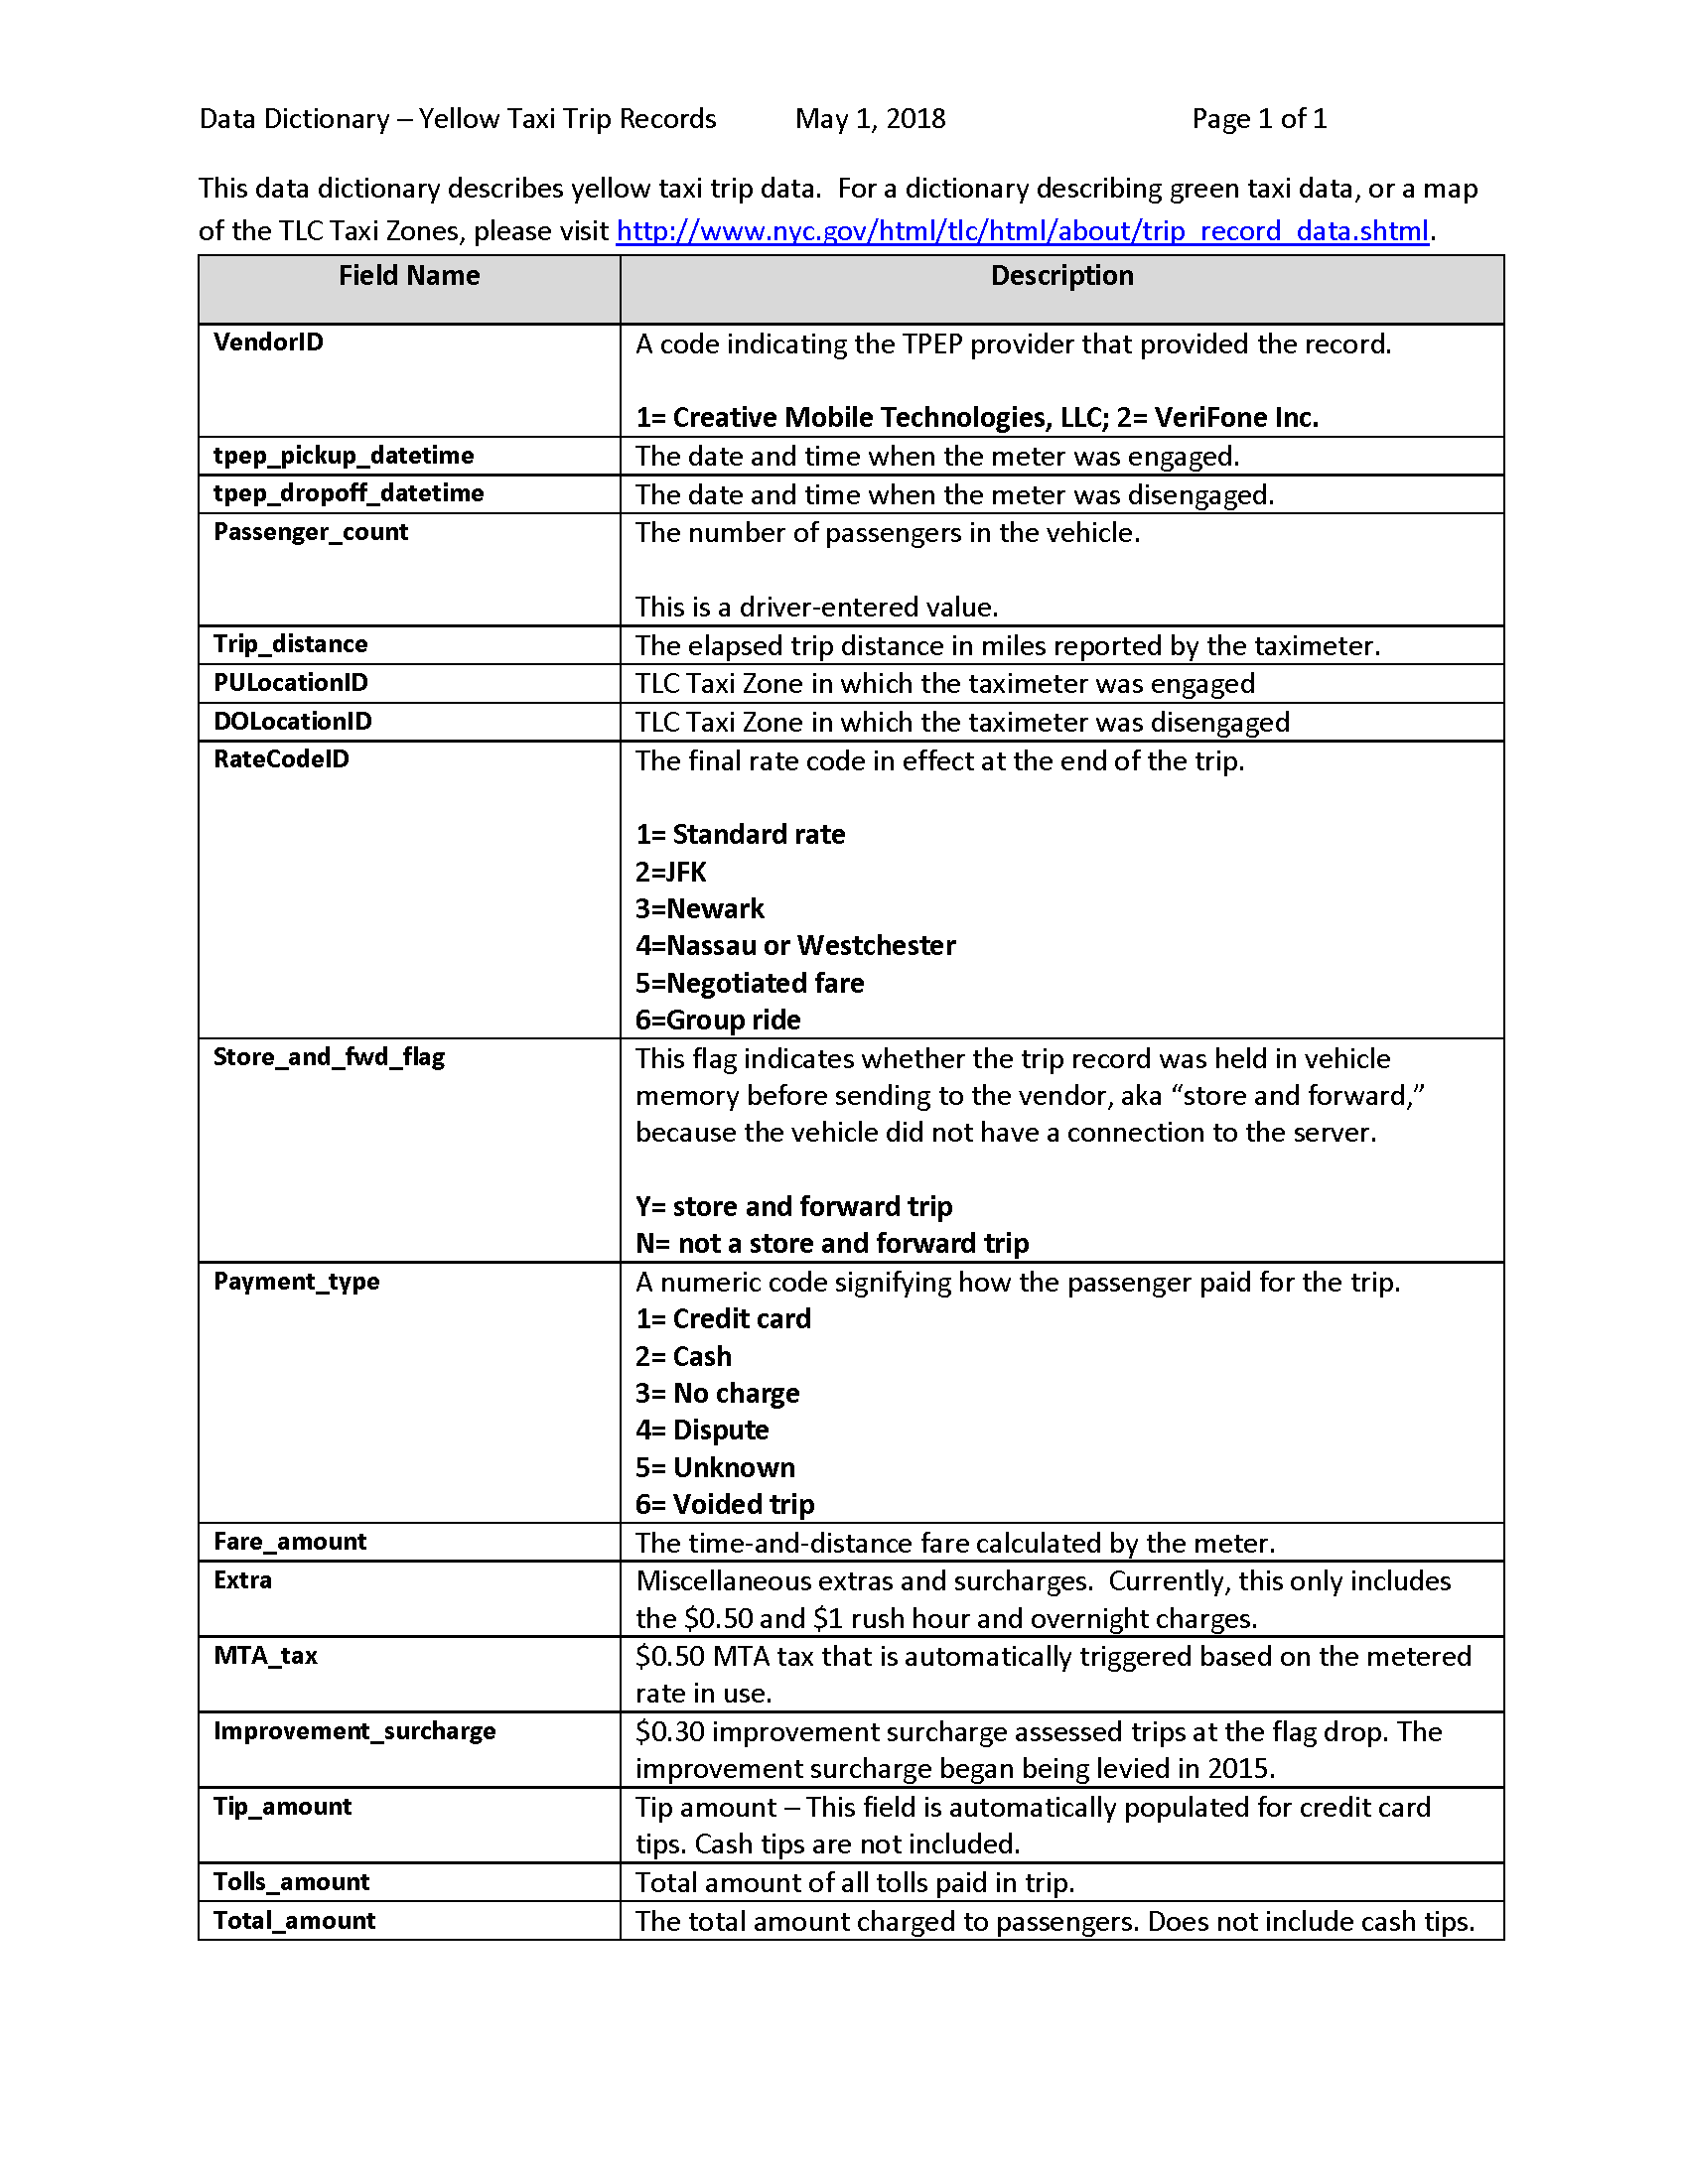

## **Only Run this cell if you want to work on a smaller porstion of data for simplicity and speed**

In [5]:
df = df.sample(frac = 0.001)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14547 entries, 4404719 to 9892465
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           14547 non-null  object 
 1   pickup_datetime     14547 non-null  object 
 2   dropoff_datetime    14547 non-null  object 
 3   passenger_count     14547 non-null  int64  
 4   trip_distance       14547 non-null  float64
 5   pickup_longitude    14547 non-null  float64
 6   pickup_latitude     14547 non-null  float64
 7   rate_code           14547 non-null  int64  
 8   store_and_fwd_flag  7480 non-null   object 
 9   dropoff_longitude   14547 non-null  float64
 10  dropoff_latitude    14547 non-null  float64
 11  payment_type        14547 non-null  object 
 12  fare_amount         14547 non-null  float64
 13  surcharge           14547 non-null  float64
 14  mta_tax             14547 non-null  float64
 15  tip_amount          14547 non-null  float64
 

In [7]:
df['pickup_datetime'].iloc[0]

'2012-09-07 10:36:32'

In [8]:
# we need a better format for our time columns:
df['pickup_DateTime'] = df['pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x ,'%Y-%m-%d %H:%M:%S'))
df['pickup_WeekDay'] = df['pickup_DateTime'].apply(lambda x: x.strftime('%A') )
df['pickup_Hour'] = df['pickup_DateTime'].apply(lambda x: x.time().hour)

df['dropoff_DateTime'] = df['dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x ,'%Y-%m-%d %H:%M:%S'))
df['dropoff_WeekDay'] = df['dropoff_DateTime'].apply(lambda x: x.strftime('%A') )
df['dropoff_Hour'] = df['dropoff_DateTime'].apply(lambda x: x.time().hour)

In [9]:
# Let's check:
df['pickup_WeekDay'].iloc[0]

'Friday'

In [10]:
df['pickup_Hour'].iloc[0]

10

In [11]:
# set style for Seaborn:
sns.set_style('white')
sns.axes_style("ticks")
sns.set_palette("Set1")

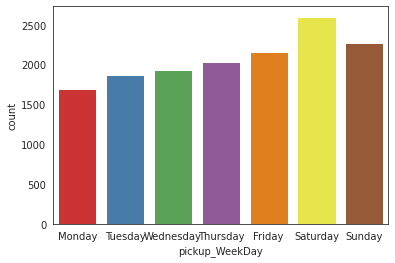

In [12]:
sns.countplot(data = df, x='pickup_WeekDay', order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

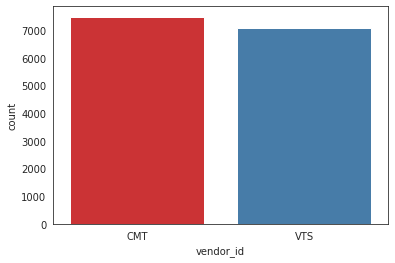

In [13]:
sns.countplot(data = df , x = 'vendor_id')

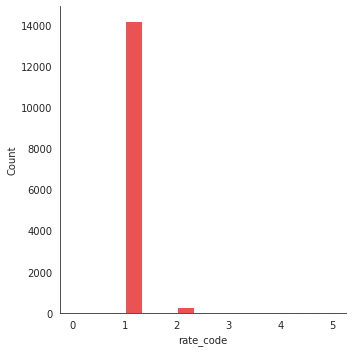

In [14]:
sns.displot(data = df , x = 'rate_code')

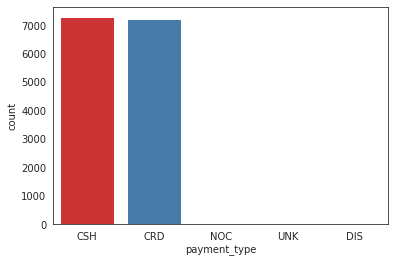

In [15]:
sns.countplot(x = df['payment_type'])

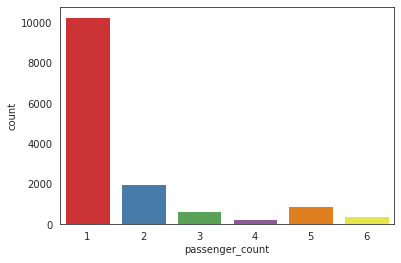

In [16]:
sns.countplot(data = df , x = 'passenger_count')

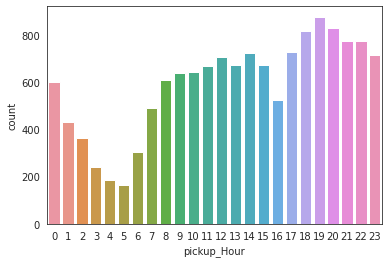

In [46]:
sns.countplot(data = df , x = 'pickup_Hour')

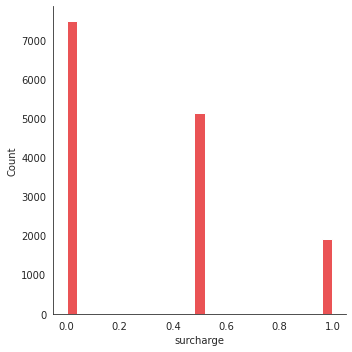

In [17]:
sns.displot(x = df['surcharge'])

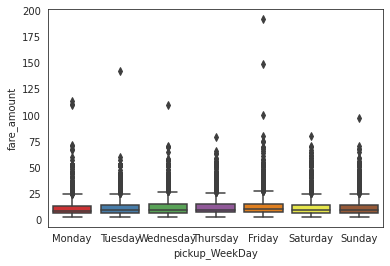

In [18]:
sns.boxplot(data= df, x='pickup_WeekDay' , y = 'fare_amount' , order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

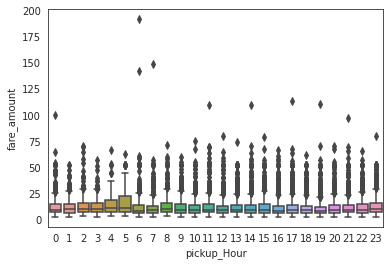

In [19]:
sns.boxplot(data=df , x = 'pickup_Hour' , y = "fare_amount" , )

In [102]:
# let's calculate lenght of each trip:

df['TravelTime'] = (df['dropoff_DateTime'] - df['pickup_DateTime'])
df['TravelTimeMinutes'] = df['TravelTime'].apply(lambda x: round(x.total_seconds()/60))
df = df.drop('TravelTime', axis=1)

In [21]:
df['TravelTimeMinutes'].iloc[0]

4

No handles with labels found to put in legend.


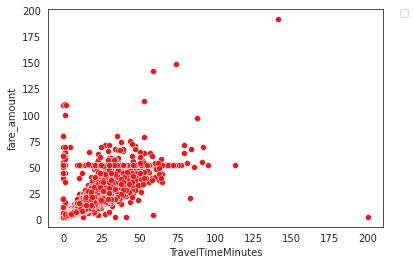

In [22]:
sns.scatterplot(data=df , x = 'TravelTimeMinutes' , y = "fare_amount")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #to relocate the legend

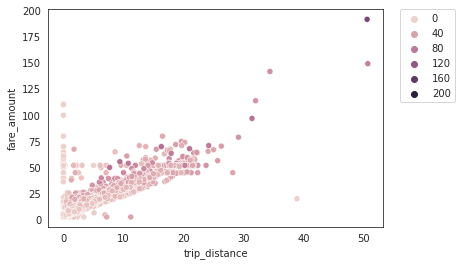

In [23]:
sns.scatterplot(data=df , x = 'trip_distance' , y = "fare_amount", hue = "TravelTimeMinutes")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #to relocate the legend

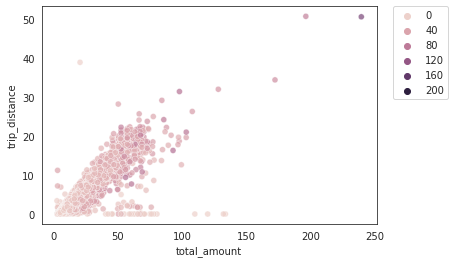

In [24]:
sns.scatterplot(data=df , x ='total_amount' , y = "trip_distance", hue = "TravelTimeMinutes" , alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #to relocate the legend

An outlier is defined as a data point that is located outside the whiskers of the box plot.
For example, outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR)

## For any analysis it would be better, if do not include them in our model.
#### For example we do not want to include generous tipers into our model, because they are rare!

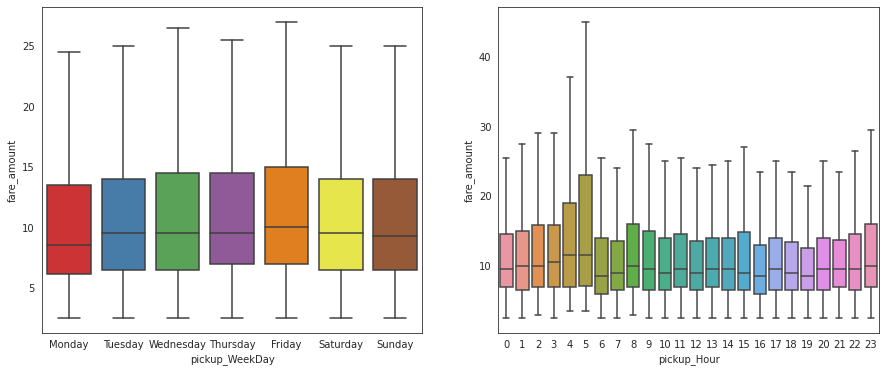

In [25]:
# let's look at our boxplots without plotting potential outliers:


plt.figure(figsize=(15,6))
plt.subplot(1,2,1 )
sns.boxplot(data= df, x='pickup_WeekDay' , y = 'fare_amount', showfliers= False , order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.subplot(1,2,2)
sns.boxplot(data=df , x = 'pickup_Hour' , y = "fare_amount" , showfliers= False)


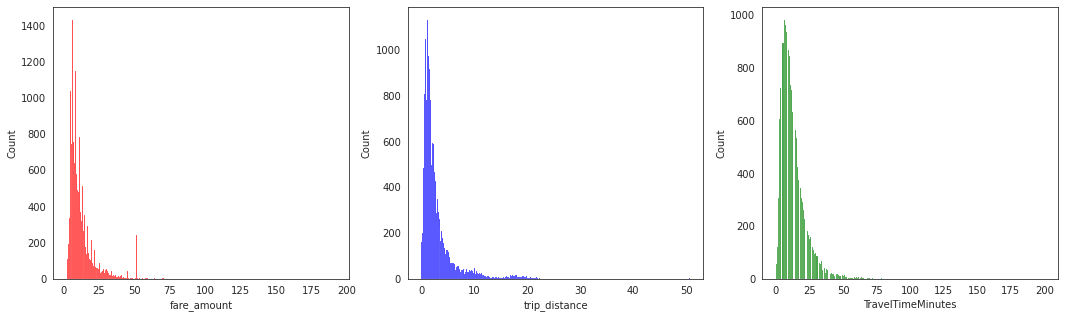

In [26]:

fig, axes = plt.subplots(ncols=3, nrows=1, figsize = (18,5))

sns.histplot(data = df , x = 'fare_amount' , ax = axes[0] , color='red')
sns.histplot(data = df , x = 'trip_distance' , ax = axes[1] , color = 'blue')
sns.histplot(data = df , x = 'TravelTimeMinutes' , ax = axes[2] , color = 'green')

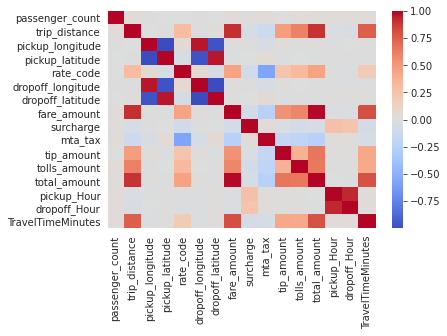

In [27]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

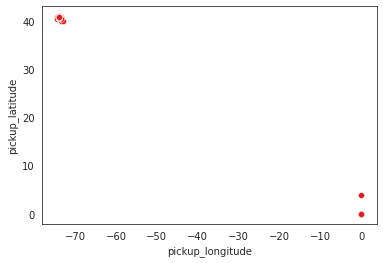

In [28]:
sns.scatterplot(data =df , x = 'pickup_longitude' , y = 'pickup_latitude')

In [37]:
df = df.drop(df[df['pickup_longitude']>-73.7].index)
df = df.drop(df[df['pickup_longitude']<-74.2].index)

In [38]:
df = df.drop(df[df['pickup_latitude']<40.2].index)

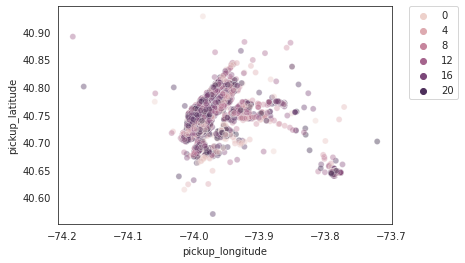

In [42]:
sns.scatterplot(data =df , x = 'pickup_longitude' , y = 'pickup_latitude', hue = 'pickup_Hour', alpha = 0.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #to relocate the legend

No handles with labels found to put in legend.


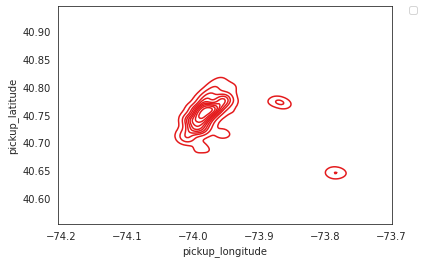

In [49]:
sns.kdeplot(data =df , x = 'pickup_longitude' , y = 'pickup_latitude')

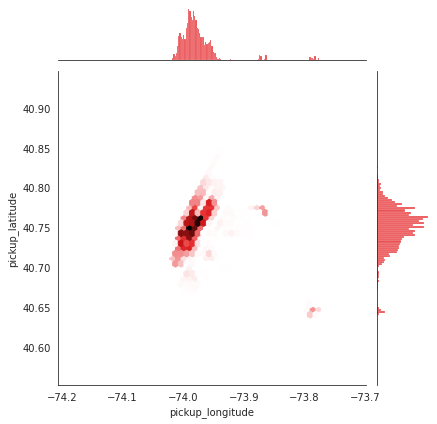

In [52]:
with sns.axes_style('white'):
  sns.jointplot(data = df,  x = 'pickup_longitude' , y = 'pickup_latitude' , kind = 'hex')

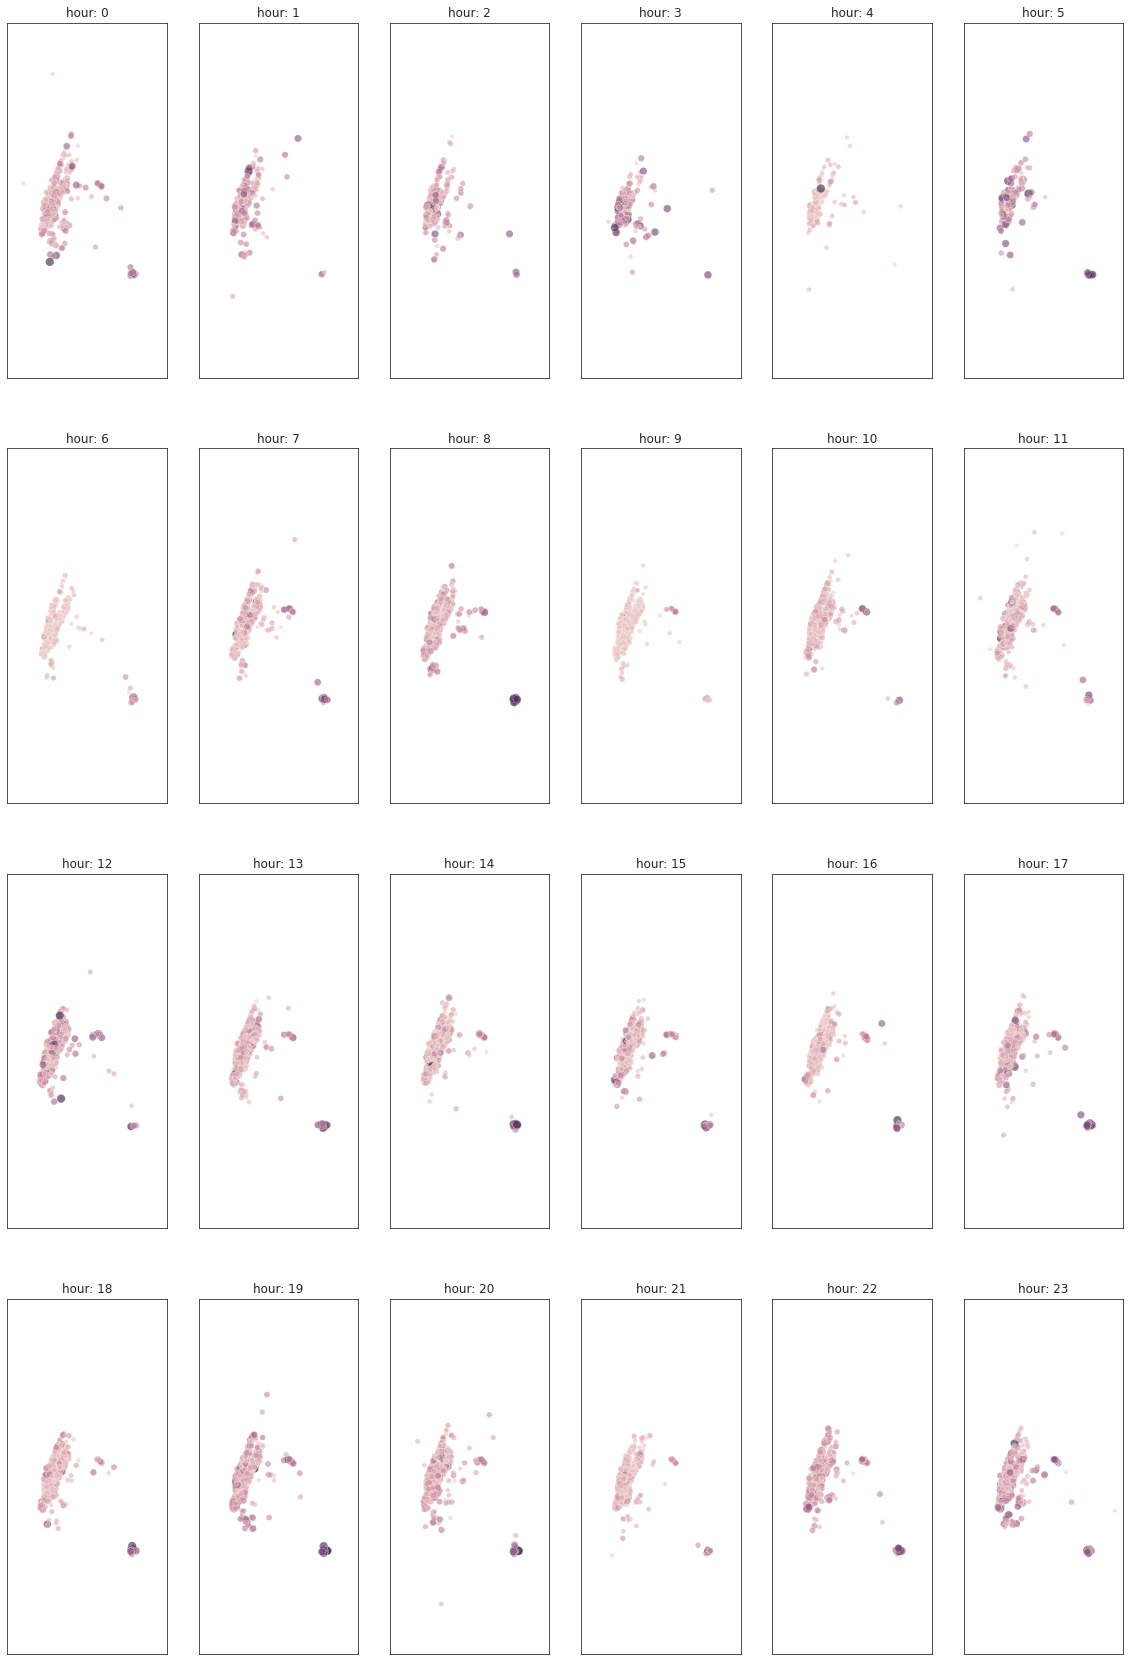

In [114]:
fig , axes = plt.subplots(4,6, figsize = (20,30))
mat = np.arange(24).reshape((4,6))

for hour in [i for i in range(0,24)]:

  loc = np.where(mat == hour)
  i = int(loc[0])
  j = int(loc[1])
  
  g1 = sns.scatterplot(ax = axes[i,j] , data = df[df['pickup_Hour']==hour] , x = 'pickup_longitude' , hue='TravelTimeMinutes', size='TravelTimeMinutes', y='pickup_latitude', alpha = 0.6, color= 'red')
  g1.set(xlabel=None)
  g1.set(ylabel=None)
  g1.set(xticklabels=[])  
  g1.set(yticklabels=[])
  g1.legend().set_visible(False)
  # g2 = sns.scatterplot(ax = axes[i,j] , data = df[df['pickup_Hour']==hour] , x = 'dropoff_longitude' , y='dropoff_latitude', alpha = 0.1 , color = 'blue')
  # g2.set(xlabel=None)
  # g2.set(ylabel=None)
  # g2.set(xticklabels=[])  
  # g2.set(yticklabels=[])  

  axes[i,j].set_xlim([-74.1, -73.7])
  axes[i,j].set_ylim([40.5,41])
  axes[i,j].set_title(f"hour: {hour}")


## After Exploratory Data Analysis, we can decide on what columns should we keep, and what columns should we drop.


In [96]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'pickup_DateTime', 'pickup_WeekDay',
       'pickup_Hour', 'dropoff_DateTime', 'dropoff_WeekDay', 'dropoff_Hour',
       'TravelTime', 'TravelTimeMinutes'],
      dtype='object')

In [119]:
df = df[['passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 
       'dropoff_longitude', 'dropoff_latitude',
       'total_amount', 'pickup_DateTime', 'pickup_WeekDay',
       'pickup_Hour', 'dropoff_DateTime', 'dropoff_Hour',
       'TravelTimeMinutes']]

In [120]:
df.head()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,total_amount,pickup_DateTime,pickup_WeekDay,pickup_Hour,dropoff_DateTime,dropoff_Hour,TravelTimeMinutes
4404719,1,0.50,-73.981320,40.752650,-73.985782,40.746572,5.00,2012-09-07 10:36:32,Friday,10,2012-09-07 10:40:22,10,4
3511450,1,1.40,-73.988644,40.740319,-73.975549,40.755493,8.75,2012-09-04 10:25:47,Tuesday,10,2012-09-04 10:33:30,10,8
384082,1,2.67,-73.992373,40.694663,-73.972072,40.670322,18.50,2012-09-19 13:20:00,Wednesday,13,2012-09-19 13:49:00,13,29
10580408,1,5.50,-74.016018,40.704794,-73.983942,40.762801,20.00,2012-09-12 22:31:04,Wednesday,22,2012-09-12 22:48:20,22,17
2310053,1,11.97,-73.874465,40.774037,-73.988758,40.758252,67.70,2012-09-24 14:21:00,Monday,14,2012-09-24 15:30:00,15,69
